## Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('result.csv')

In [3]:
df.head()

,INCREMENTAL_KEY,ZION_ANON_ID,WEEK,SESSION_CNT,YOUR_CNN_SESSION_CNT,DAYS_VISITED,ARTICLES_PV,WATCH_NEXT_PV,YOUR_CNN_PV,TOP_NEWS_PV,WORLD_PV,POLITICS_PV
0,308D130B-FF66-43B3-AE33-C2ABDB1354C9-2022-12-05,308D130B-FF66-43B3-AE33-C2ABDB1354C9,2022-12-05,14,0,4,16,4,0,23,0,0
1,09D7DF14-750B-4974-9D2C-D50F38AE12B5-2022-12-05,09D7DF14-750B-4974-9D2C-D50F38AE12B5,2022-12-05,1,0,1,2,0,0,2,0,0
2,A631FF70-0589-4398-A5F6-31E4C5832BA1-2022-12-05,A631FF70-0589-4398-A5F6-31E4C5832BA1,2022-12-05,19,0,7,17,0,0,54,0,0
3,9FC9D6BD-4FFF-4A2F-8E32-33EB6EC95E85-2022-12-05,9FC9D6BD-4FFF-4A2F-8E32-33EB6EC95E85,2022-12-05,5,1,2,13,2,1,18,0,0
4,1B495B4B-0907-4FA3-9BFC-91D79A9A7FC3-2022-12-05,1B495B4B-0907-4FA3-9BFC-91D79A9A7FC3,2022-12-05,5,0,1,2,1,0,6,0,0


## Skewness

In [4]:
df.skew()


C:\Users\sabansal\AppData\Local\Temp\1\ipykernel_24916\547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


SESSION_CNT              2.482134
YOUR_CNN_SESSION_CNT     9.151231
DAYS_VISITED             0.134141
ARTICLES_PV              3.557970
WATCH_NEXT_PV            6.058910
YOUR_CNN_PV             10.579815
TOP_NEWS_PV              3.176683
WORLD_PV                 9.561716
POLITICS_PV             12.126561
dtype: float64

In [5]:
df.duplicated().sum()


0

In [6]:
df.isnull().sum()


INCREMENTAL_KEY         0
ZION_ANON_ID            0
WEEK                    0
SESSION_CNT             0
YOUR_CNN_SESSION_CNT    0
DAYS_VISITED            0
ARTICLES_PV             0
WATCH_NEXT_PV           0
YOUR_CNN_PV             0
TOP_NEWS_PV             0
WORLD_PV                0
POLITICS_PV             0
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INCREMENTAL_KEY       3000 non-null   object
 1   ZION_ANON_ID          3000 non-null   object
 2   WEEK                  3000 non-null   object
 3   SESSION_CNT           3000 non-null   int64 
 4   YOUR_CNN_SESSION_CNT  3000 non-null   int64 
 5   DAYS_VISITED          3000 non-null   int64 
 6   ARTICLES_PV           3000 non-null   int64 
 7   WATCH_NEXT_PV         3000 non-null   int64 
 8   YOUR_CNN_PV           3000 non-null   int64 
 9   TOP_NEWS_PV           3000 non-null   int64 
 10  WORLD_PV              3000 non-null   int64 
 11  POLITICS_PV           3000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 281.4+ KB


## Exploratory Data Analysis

In [8]:
df.corr()


,SESSION_CNT,YOUR_CNN_SESSION_CNT,DAYS_VISITED,ARTICLES_PV,WATCH_NEXT_PV,YOUR_CNN_PV,TOP_NEWS_PV,WORLD_PV,POLITICS_PV
SESSION_CNT,1.000000,0.255646,0.727719,0.693156,0.416837,0.213671,0.827259,0.238694,0.207348
YOUR_CNN_SESSION_CNT,0.255646,1.000000,0.163191,0.248354,0.201901,0.897831,0.215978,0.323563,0.292475
DAYS_VISITED,0.727719,0.163191,1.000000,0.551300,0.301467,0.149648,0.639629,0.165695,0.132202
ARTICLES_PV,0.693156,0.248354,0.551300,1.000000,0.392064,0.295446,0.909867,0.281793,0.235014
WATCH_NEXT_PV,0.416837,0.201901,0.301467,0.392064,1.000000,0.191330,0.473064,0.056614,0.056560
YOUR_CNN_PV,0.213671,0.897831,0.149648,0.295446,0.191330,1.000000,0.213592,0.283853,0.220912
TOP_NEWS_PV,0.827259,0.215978,0.639629,0.909867,0.473064,0.213592,1.000000,0.217137,0.195103
WORLD_PV,0.238694,0.323563,0.165695,0.281793,0.056614,0.283853,0.217137,1.000000,0.315091
POLITICS_PV,0.207348,0.292475,0.132202,0.235014,0.056560,0.220912,0.195103,0.315091,1.000000


In [9]:
df.drop(['INCREMENTAL_KEY','ZION_ANON_ID'],axis = 1,inplace = True)


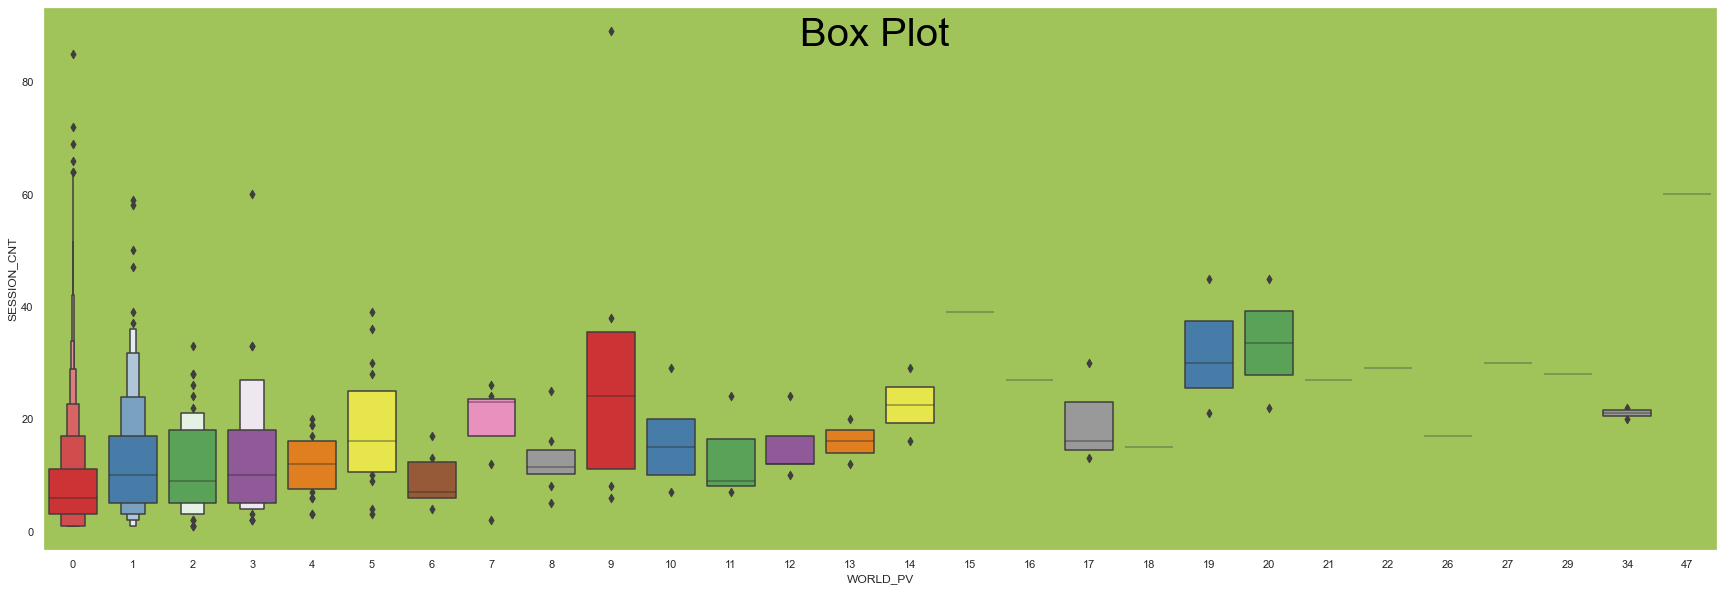

In [17]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(30,10))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=df['WORLD_PV'] , y = df['SESSION_CNT'],palette="Set1")
plt.show()

In [22]:
df.columns

Index(['WEEK', 'SESSION_CNT', 'YOUR_CNN_SESSION_CNT', 'DAYS_VISITED',
       'ARTICLES_PV', 'WATCH_NEXT_PV', 'YOUR_CNN_PV', 'TOP_NEWS_PV',
       'WORLD_PV', 'POLITICS_PV'],
      dtype='object')

In [23]:
df.drop(['WEEK'],axis = 1,inplace = True)
df

,SESSION_CNT,YOUR_CNN_SESSION_CNT,DAYS_VISITED,ARTICLES_PV,WATCH_NEXT_PV,YOUR_CNN_PV,TOP_NEWS_PV,WORLD_PV,POLITICS_PV
0,14,0,4,16,4,0,23,0,0
1,1,0,1,2,0,0,2,0,0
2,19,0,7,17,0,0,54,0,0
3,5,1,2,13,2,1,18,0,0
4,5,0,1,2,1,0,6,0,0
...,...,...,...,...,...,...,...,...,...
2995,33,6,7,52,0,7,67,2,9
2996,4,0,3,4,0,0,7,0,0
2997,3,0,2,2,1,0,5,0,0
2998,2,0,2,1,0,0,2,0,0


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(df.drop(['SESSION_CNT'],axis = 1))
scaled_features = scaler.transform(df.drop('SESSION_CNT',axis = 1))

### WORLD PV 

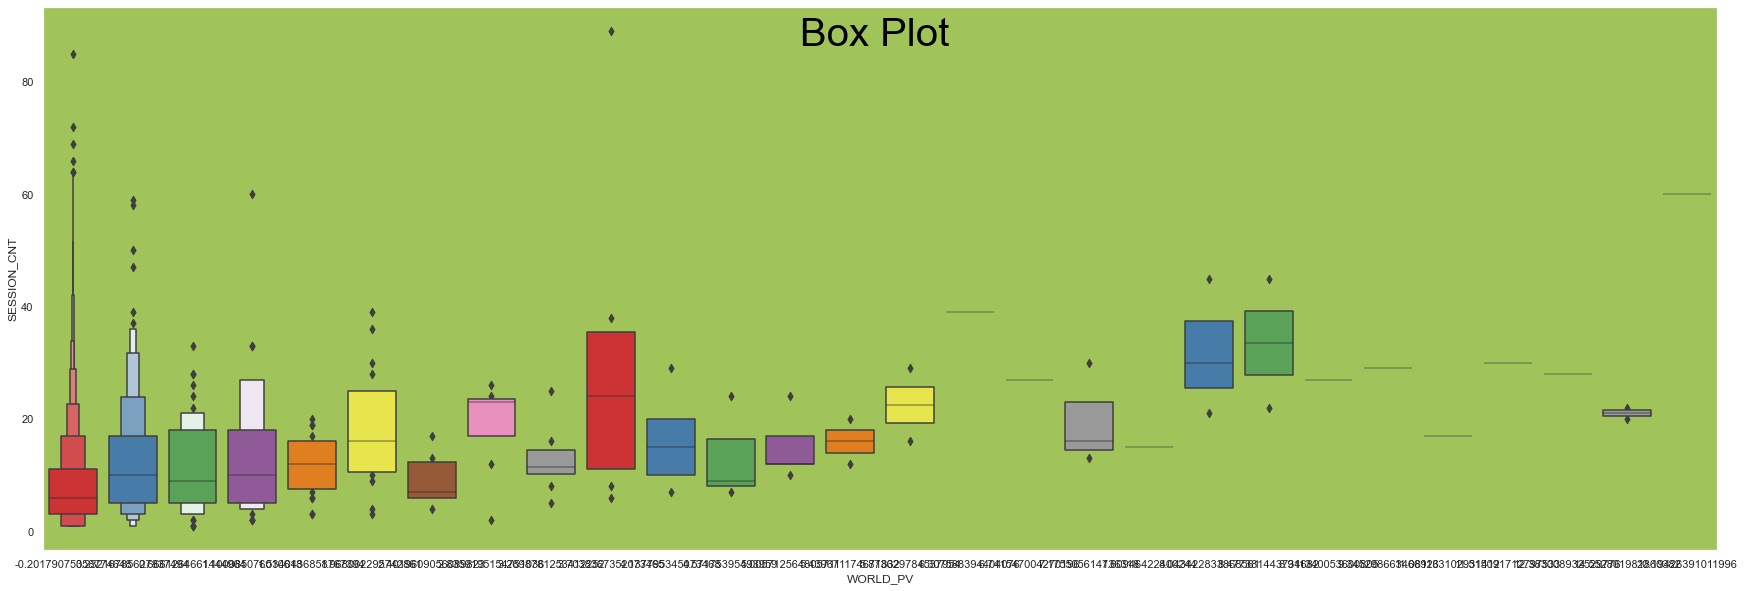

In [44]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(30,10))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=X['WORLD_PV'] , y = df['SESSION_CNT'],palette="Set1")
plt.show()

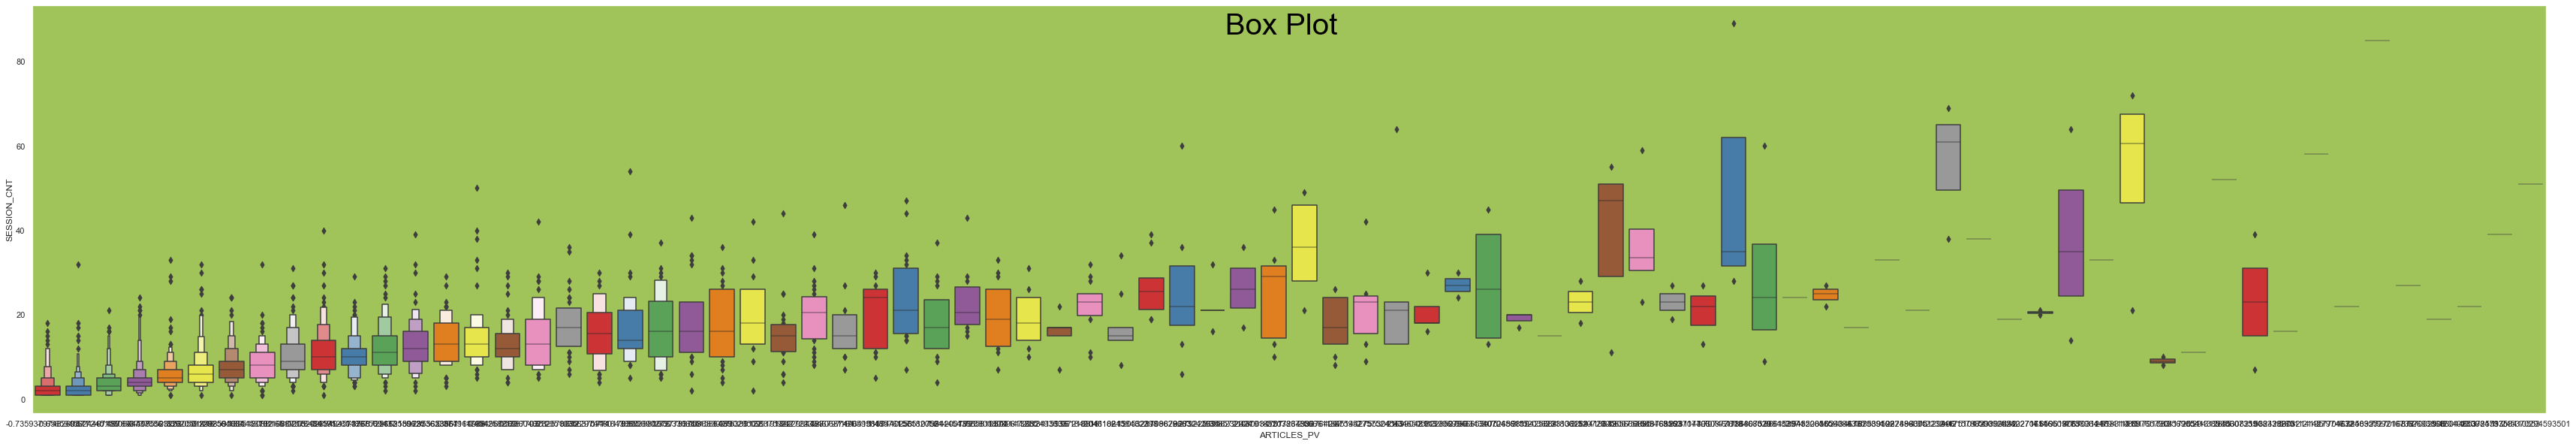

In [50]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(60,10))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=X['ARTICLES_PV'] , y = df['SESSION_CNT'],palette="Set1")
plt.show()

In [51]:
df.columns

Index(['SESSION_CNT', 'YOUR_CNN_SESSION_CNT', 'DAYS_VISITED', 'ARTICLES_PV',
       'WATCH_NEXT_PV', 'YOUR_CNN_PV', 'TOP_NEWS_PV', 'WORLD_PV',
       'POLITICS_PV'],
      dtype='object')

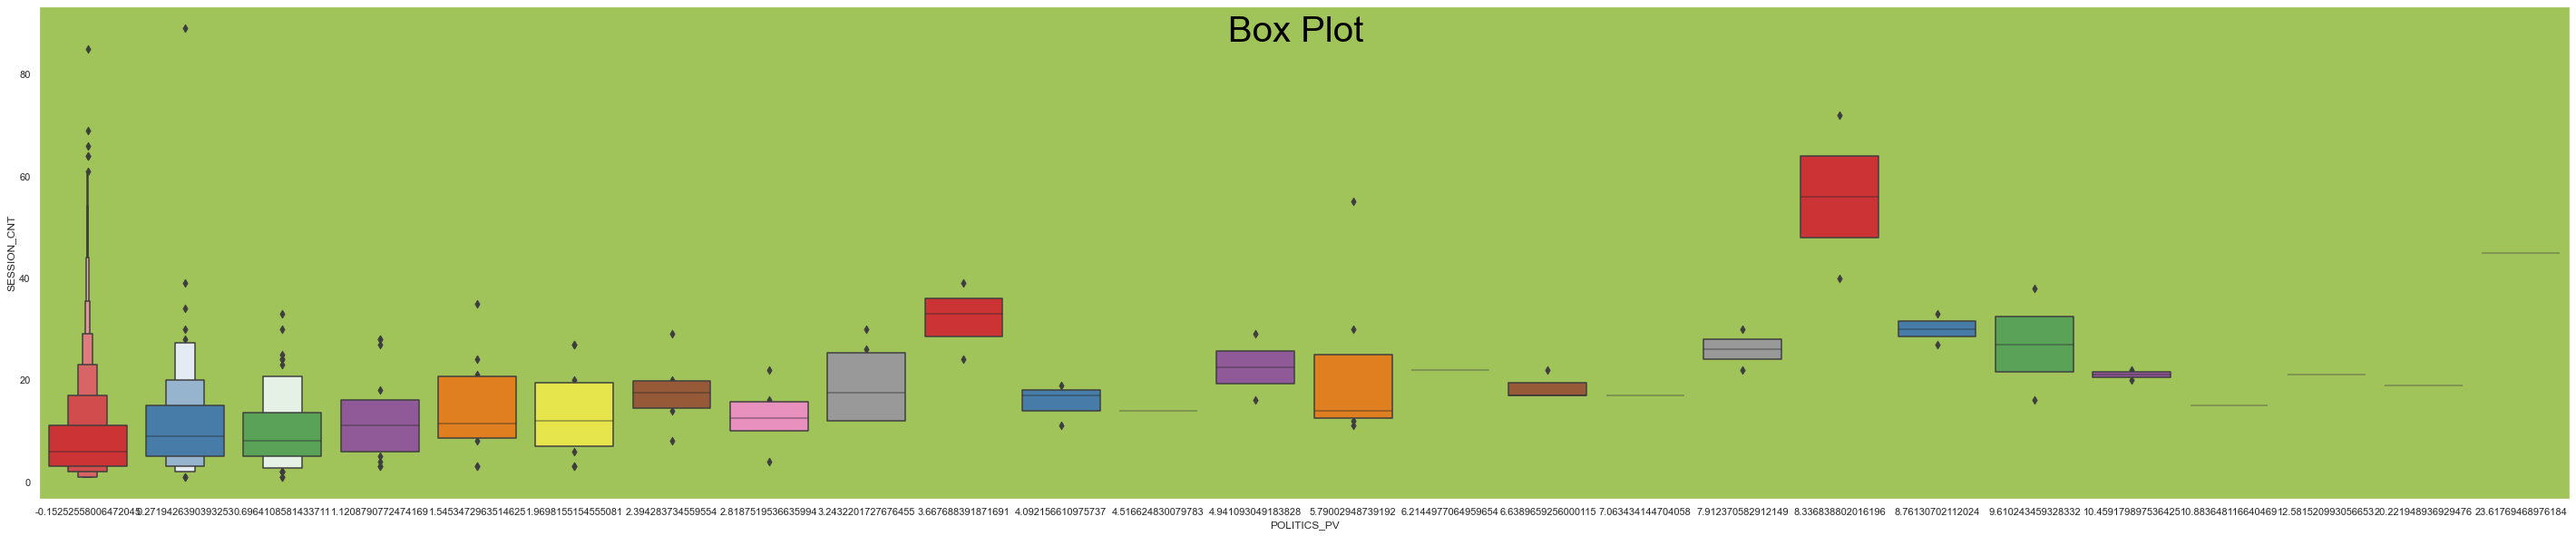

In [57]:
sns.set(rc={"axes.facecolor":"#a1c45a" , "axes.grid" : False})
plt.figure(figsize=(50,10))
plt.gcf().text(.51, .84, "Box Plot", fontsize = 40, color='Black' ,ha='center', va='center')
sns.boxenplot(x=X['POLITICS_PV'] , y = df['SESSION_CNT'],palette="Set1")
plt.show()

## Regression Model 

In [26]:
X.corr()


,YOUR_CNN_SESSION_CNT,DAYS_VISITED,ARTICLES_PV,WATCH_NEXT_PV,YOUR_CNN_PV,TOP_NEWS_PV,WORLD_PV,POLITICS_PV
YOUR_CNN_SESSION_CNT,1.000000,0.163191,0.248354,0.201901,0.897831,0.215978,0.323563,0.292475
DAYS_VISITED,0.163191,1.000000,0.551300,0.301467,0.149648,0.639629,0.165695,0.132202
ARTICLES_PV,0.248354,0.551300,1.000000,0.392064,0.295446,0.909867,0.281793,0.235014
WATCH_NEXT_PV,0.201901,0.301467,0.392064,1.000000,0.191330,0.473064,0.056614,0.056560
YOUR_CNN_PV,0.897831,0.149648,0.295446,0.191330,1.000000,0.213592,0.283853,0.220912
TOP_NEWS_PV,0.215978,0.639629,0.909867,0.473064,0.213592,1.000000,0.217137,0.195103
WORLD_PV,0.323563,0.165695,0.281793,0.056614,0.283853,0.217137,1.000000,0.315091
POLITICS_PV,0.292475,0.132202,0.235014,0.056560,0.220912,0.195103,0.315091,1.000000


In [27]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j]>abs(0.5))&(i!=j)]
z,len(z)

([['YOUR_CNN_SESSION_CNT', 'YOUR_CNN_PV'],
  ['DAYS_VISITED', 'ARTICLES_PV'],
  ['DAYS_VISITED', 'TOP_NEWS_PV'],
  ['ARTICLES_PV', 'DAYS_VISITED'],
  ['ARTICLES_PV', 'TOP_NEWS_PV'],
  ['YOUR_CNN_PV', 'YOUR_CNN_SESSION_CNT'],
  ['TOP_NEWS_PV', 'DAYS_VISITED'],
  ['TOP_NEWS_PV', 'ARTICLES_PV']],
 8)

In [30]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 12.7 MB/s eta 0:00:00
     ------------------------------------- 233.8/233.8 kB 14.9 MB/s eta 0:00:00


## Assessing Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=X
## calculating VIF for every column
VIF=pd.Series([variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])],index=vif_data.columns)
VIF

YOUR_CNN_SESSION_CNT    5.906432
DAYS_VISITED            1.716076
ARTICLES_PV             7.009910
WATCH_NEXT_PV           1.336894
YOUR_CNN_PV             5.840505
TOP_NEWS_PV             8.123517
WORLD_PV                1.249745
POLITICS_PV             1.206791
dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X = vif_data
Y = df['SESSION_CNT']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=44)

In [39]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

## Assessing OLS Results

In [40]:
import statsmodels.api as sm


In [43]:
X2 = sm.add_constant(X_train)
est = sm.OLS(Y_train,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            SESSION_CNT   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     877.5
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        13:10:19   Log-Likelihood:                -6042.8
No. Observations:                2100   AIC:                         1.210e+04
Df Residuals:                    2091   BIC:                         1.215e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.9192 

In [60]:
print(regressor.intercept_)

8.919158086471905


In [58]:
y_pred=regressor.predict(X_test)


In [62]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns = ['Coefficient'])
coeff_df

,Coefficient
YOUR_CNN_SESSION_CNT,1.768083
DAYS_VISITED,2.873265
ARTICLES_PV,-2.965190
WATCH_NEXT_PV,0.047115
YOUR_CNN_PV,-1.320659
TOP_NEWS_PV,7.778961
WORLD_PV,0.572748
POLITICS_PV,0.588049


In [59]:
y_pred


array([ 0.50265815,  0.73793533,  1.10839081, 10.92242017, 10.73942107,
        9.13516228,  8.830154  , 11.86352892,  4.27392927,  6.71737136,
        0.73793533, 17.20344894,  3.00493011,  2.13911989,  1.10839081,
        0.50265815,  4.43091504,  2.39919745,  0.73793533,  4.34109517,
       12.727844  , 10.28250508,  0.87311363,  4.70127162,  3.27148748,
        0.87311363, 14.63615747, 15.58859773,  6.13110023,  3.88101936,
        9.64977902,  8.64280043,  5.37202379,  1.5271976 ,  7.09299303,
        0.73793533,  2.11837142,  3.2402073 ,  4.89111145,  5.13557115,
        4.19563785,  4.38665313,  2.78911447,  6.30265397, 29.54717871,
       14.78051828,  3.55482579, 17.64001998,  8.06635768,  7.40374138,
        3.92528127,  9.27952309,  4.80137052,  4.55047547,  1.2435691 ,
       16.47002535, 18.14969698,  2.76965293,  6.20255507,  1.14347021,
       19.5613601 ,  8.17973173, 15.035257  , 19.51083033,  3.354628  ,
       13.14567487,  2.10681413, 32.05069238,  2.39919745,  7.24

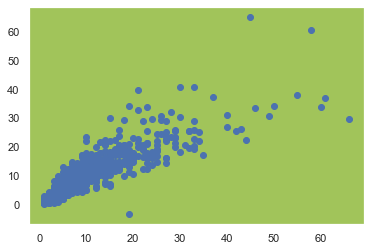

In [63]:
predictions = regressor.predict(X_test)
plt.scatter(Y_test,predictions)

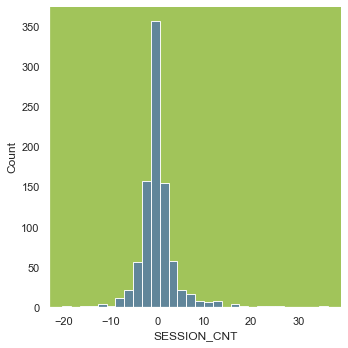

In [70]:
sns.displot((Y_test - predictions), bins = 30)

In [72]:
from sklearn import metrics

In [79]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Mean Absolute Error:  2.4705968008140227
Mean Squared Error: 17.693600085651106
Root Mean Squared Error 4.206376122703616
